In [2]:
# Phase 2: Simple data analysis for fraud transactions

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 50)

# Load the cleaned data
df = pd.read_pickle("../outputs/clean_data.pkl")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 29 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   transaction_id         int64         
 1   date                   datetime64[ns]
 2   user_id                int64         
 3   card_id                int64         
 4   amount                 float64       
 5   use_chip               int8          
 6   merchant_id            int64         
 7   mcc_code               int64         
 8   is_fraud               int64         
 9   client_id              int64         
 10  card_brand             int8          
 11  card_type              int8          
 12  expires                datetime64[ns]
 13  has_chip               int64         
 14  num_cards_issued       int64         
 15  credit_limit           float64       
 16  acct_open_date         datetime64[ns]
 17  year_pin_last_changed  int64         
 18  card_on_dark_web    

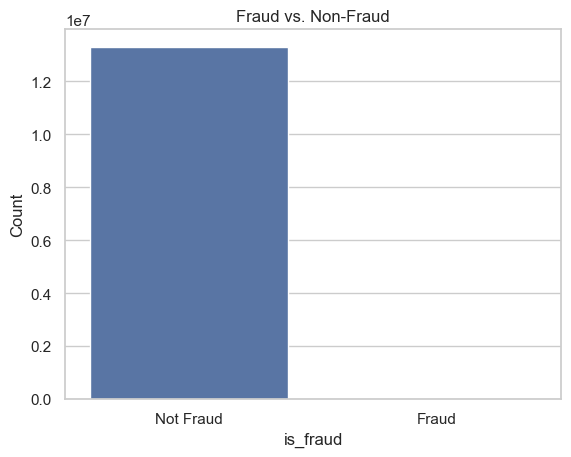

is_fraud
0    0.998998
1    0.001002
Name: proportion, dtype: float64


In [3]:
# Show Fraud Distribution
sns.countplot(x="is_fraud", data=df)
plt.title("Fraud vs. Non-Fraud")
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.ylabel("Count")
plt.savefig("../outputs/eda_results/fraud_distribution.png", dpi=300, bbox_inches='tight')
plt.show()
print(df["is_fraud"].value_counts(normalize=True))

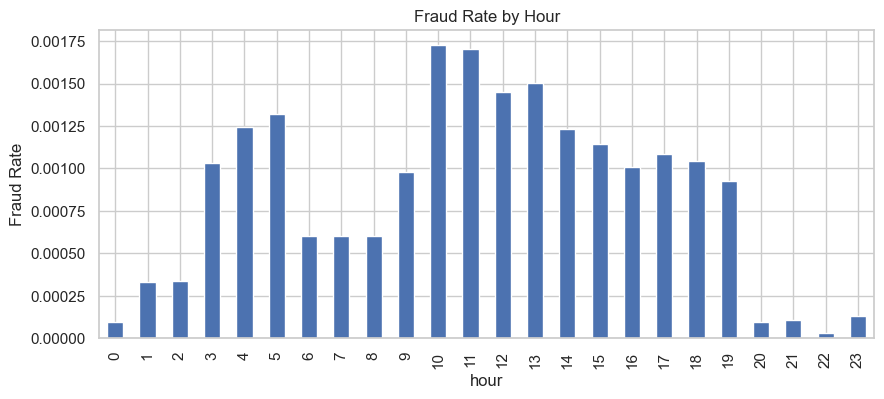

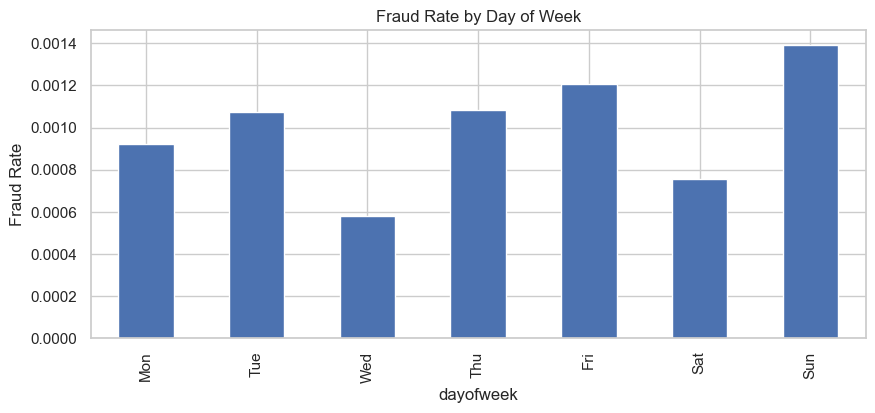

In [10]:
df["hour"] = df["date"].dt.hour
df["dayofweek"] = df["date"].dt.dayofweek

# Fraud by hour
df.groupby("hour")["is_fraud"].mean().plot(kind="bar", figsize=(10, 4))
plt.title("Fraud Rate by Hour")
plt.ylabel("Fraud Rate")
plt.savefig("../outputs/eda_results/fraud_by_hour.png", dpi=300, bbox_inches='tight')
plt.show()

# Fraud by day of week
df.groupby("dayofweek")["is_fraud"].mean().plot(kind="bar", figsize=(10, 4))
plt.title("Fraud Rate by Day of Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.ylabel("Fraud Rate")
plt.savefig("../outputs/eda_results/fraud_by_day.png", dpi=300, bbox_inches='tight')
plt.show()


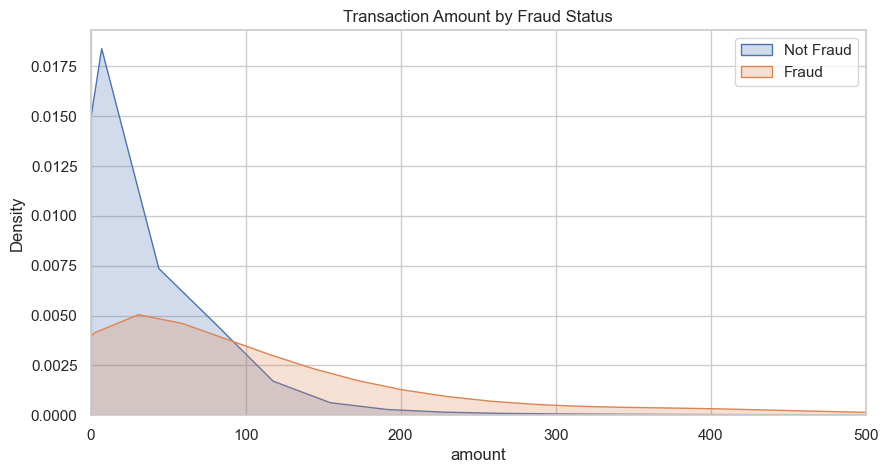

In [5]:
# Amount Distributions

plt.figure(figsize=(10, 5))
sns.kdeplot(df[df.is_fraud == 0]["amount"], label="Not Fraud", fill=True)
sns.kdeplot(df[df.is_fraud == 1]["amount"], label="Fraud", fill=True)
plt.title("Transaction Amount by Fraud Status")
plt.xlim(0, 500)  # Focus view
plt.legend()
plt.savefig("../outputs/eda_results/amount_distributions.png", dpi=300, bbox_inches='tight')
plt.show()

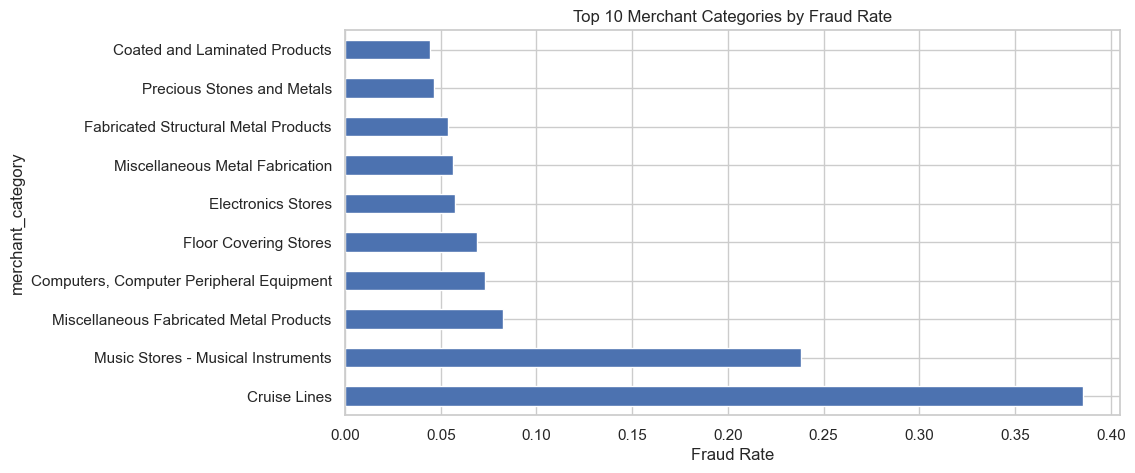

In [6]:
# Top Merchant Category

fraud_by_cat = df.groupby("merchant_category")["is_fraud"].mean().sort_values(ascending=False).head(10)
fraud_by_cat.plot(kind="barh", figsize=(10, 5))
plt.title("Top 10 Merchant Categories by Fraud Rate")
plt.xlabel("Fraud Rate")
plt.savefig("../outputs/eda_results/top_merchant_category.png", dpi=300, bbox_inches='tight')
plt.show()

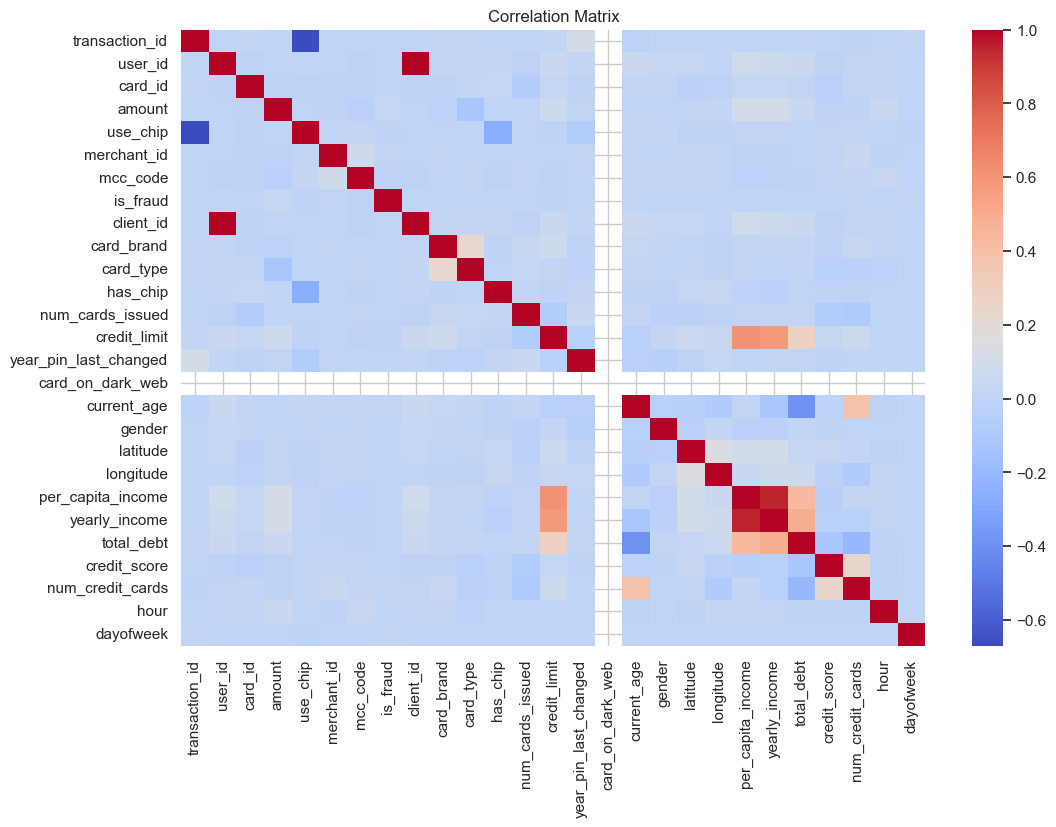

In [7]:
# Correlation Matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.savefig("../outputs/eda_results/correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


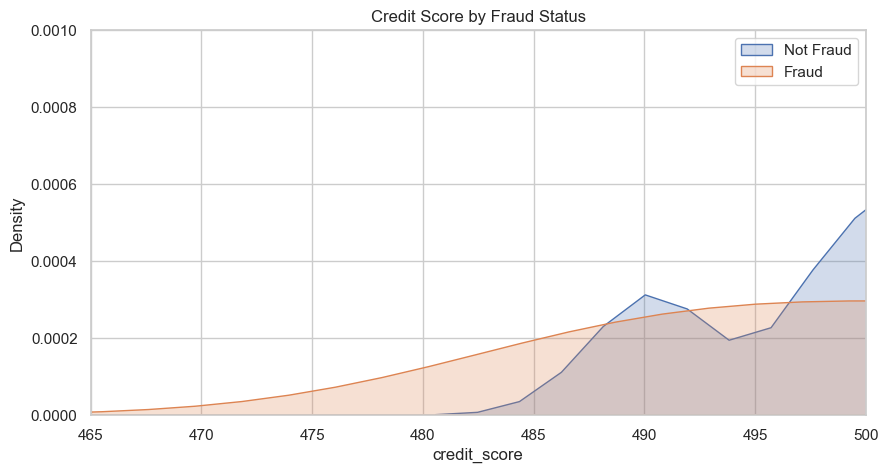

In [4]:
# Credit Score Distributions

plt.figure(figsize=(10, 5))
sns.kdeplot(df[df.is_fraud == 0]["credit_score"], label="Not Fraud", fill=True)
sns.kdeplot(df[df.is_fraud == 1]["credit_score"], label="Fraud", fill=True)
plt.title("Credit Score by Fraud Status")
plt.xlim(465, 500)  # Focus view
plt.ylim(0,.001)
plt.legend()
plt.savefig("../outputs/eda_results/credit_score.png", dpi=300, bbox_inches='tight')
plt.show()

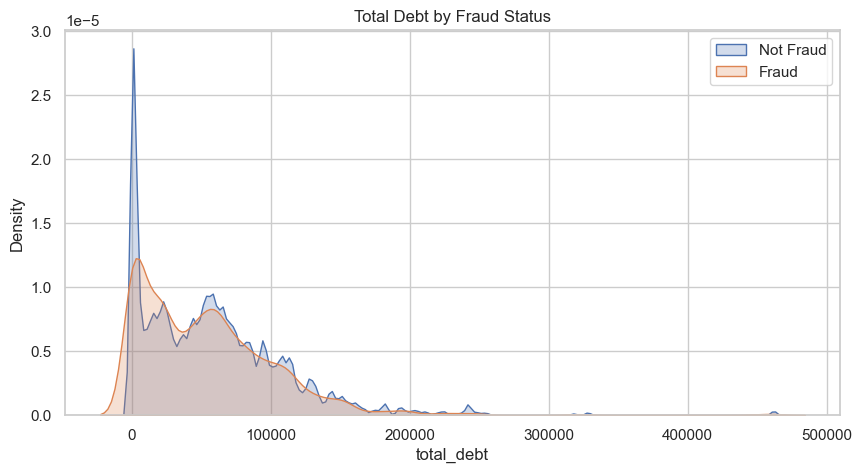

In [3]:
# Total Debt Distributions

plt.figure(figsize=(10, 5))
sns.kdeplot(df[df.is_fraud == 0]["total_debt"], label="Not Fraud", fill=True)
sns.kdeplot(df[df.is_fraud == 1]["total_debt"], label="Fraud", fill=True)
plt.title("Total Debt by Fraud Status")
plt.legend()
plt.savefig("../outputs/eda_results/total_debt_distribution.png", dpi=300, bbox_inches='tight')
plt.show()